In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [53]:
train_set = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
test_set = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')
print(f'Training size: {len(train_set)}')
print(f'Test size: {len(test_set)}')

Training size: 60000
Test size: 10000


In [54]:
train_set.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
def preprocess_data(train_set, test_set):
    x_train = np.array(train_set.drop(['label'], axis=1)) / 255
    x_test = np.array(test_set.drop(['label'], axis=1)) / 255
    y_train = np.array(train_set['label'])
    y_test = np.array(test_set['label'])
    return x_train, x_test, y_train, y_test

In [56]:
x_train, x_test, y_train, y_test = preprocess_data(train_set, test_set)
print(f'Training set: {x_train.shape} - {y_train.shape}')
print(f'Test set: {x_test.shape} - {y_test.shape}')

Training set: (60000, 784) - (60000,)
Test set: (10000, 784) - (10000,)


In [57]:
digit_classifier = SVC(C=200, gamma=1e-2)

In [58]:
digit_classifier.fit(x_train, y_train)

SVC(C=200, gamma=0.01)

In [59]:
y_predict = digit_classifier.predict(x_test)
y_predict

array([7, 2, 1, ..., 4, 5, 6])

In [60]:
print(f"Accuracy: {accuracy_score(y_test, y_predict)}")
print(f"Precision: {precision_score(y_test, y_predict, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_predict, average='weighted')}")
print(f"F1: {f1_score(y_test, y_predict, average='weighted')}")

Accuracy: 0.9824
Precision: 0.9824016154642639
Recall: 0.9824
F1: 0.9823911388741174


In [61]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



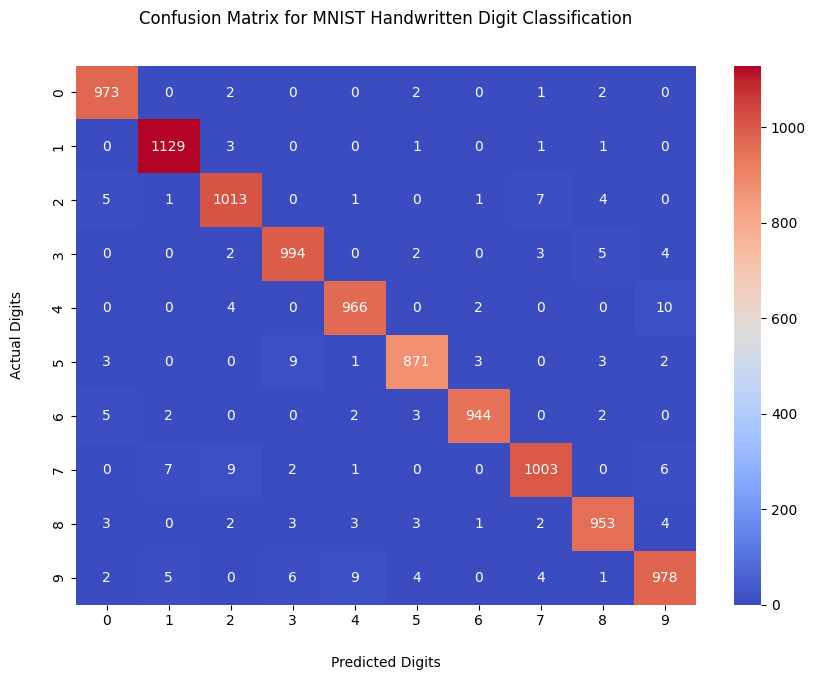

In [62]:
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_predict)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap ='coolwarm')
ax.set_xlabel("Predicted Digits", labelpad=20)
ax.set_ylabel("Actual Digits", labelpad=20)
ax.set_title("Confusion Matrix for MNIST Handwritten Digit Classification", pad=30)
plt.show()

In [17]:
import pickle

model_name = 'handwritten-digit-classifier.pkl'
with open(model_name, 'wb') as f:
    pickle.dump(digit_classifier, f)

In [19]:
from IPython.display import FileLink
FileLink(r'/kaggle/working/handwritten-digit-classifier.pkl')

/kaggle/working/handwritten-digit-classifier.pkl